# LSH - Chroma STFT

In [25]:
import librosa, librosa.display
import os
import os.path
import numpy as np
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
training_dir = '../conv_genre_wavs/pop/'
training_files = [os.path.join(training_dir, f) for f in os.listdir(training_dir)]

In [21]:
len(training_files)

99

In [4]:
def hash_func(vecs, projections):
    bools = np.dot(vecs, projections.T) > 0
    return [bool2int(bool_vec) for bool_vec in bools]

In [5]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        if j: y += 1<<i
    return y

In [6]:
bool2int([False, True, False, True])

10

In [7]:
class Table:
    
    def __init__(self, hash_size, dim):
        self.table = dict()
        self.hash_size = hash_size
        self.projections = np.random.randn(self.hash_size, dim)

    def add(self, vecs, label):
        entry = {'label': label}
        hashes = hash_func(vecs, self.projections)
        for h in hashes:
            if self.table.has_key(h):
                self.table[h].append(entry)
            else:
                self.table[h] = [entry]

    def query(self, vecs):
        hashes = hash_func(vecs, self.projections)
        results = list()
        for h in hashes:
            if self.table.has_key(h):
                results.extend(self.table[h])
        return results

In [8]:
class LSH:
    
    def __init__(self, dim):
        self.num_tables = 4
        self.hash_size = 8
        self.tables = list()
        for i in range(self.num_tables):
            self.tables.append(Table(self.hash_size, dim))
    
    def add(self, vecs, label):
        for table in self.tables:
            table.add(vecs, label)
    
    def query(self, vecs):
        results = list()
        for table in self.tables:
            results.extend(table.query(vecs))
        return results

    def describe(self):
        for table in self.tables:
            print(table.table)

In [29]:
class MusicSearch:
    
    def __init__(self, training_files):
        self.frame_size = 4096
        self.hop_size = 4000
        self.fv_size = 12
        self.n_mfcc = 12
        self.lsh = LSH(self.fv_size)
        self.training_files = training_files
        self.num_features_in_file = dict()
        for f in self.training_files:
            self.num_features_in_file[f] = 0
                
    def train(self):
        for filepath in tqdm(self.training_files):
            if filepath.endswith('.wav'):
                print(filepath)
                y,sr = librosa.load(filepath)
                features = librosa.feature.chroma_stft(y,sr, n_fft=self.frame_size, hop_length=self.hop_size).T
                self.lsh.add(features, filepath)
                self.num_features_in_file[filepath] += len(features)
                
    def query(self, filepath):
        y, sr = librosa.load(filepath)
        features = librosa.feature.chroma_stft(y, sr, n_fft=self.frame_size, hop_length=self.hop_size).T
        results = self.lsh.query(features)
        print('num results', len(results))

        counts = dict()
        for r in results:
            if counts.has_key(r['label']):
                counts[r['label']] += 1
            else:
                counts[r['label']] = 1
        for k in counts:
            counts[k] = float(counts[k])/self.num_features_in_file[k]
        return counts

In [30]:
ms = MusicSearch(training_files)
ms.train()

  2%|▏         | 2/99 [00:00<00:05, 18.04it/s]

../conv_genre_wavs/pop/pop.00027.wav
../conv_genre_wavs/pop/pop.00033.wav
../conv_genre_wavs/pop/pop.00032.wav
../conv_genre_wavs/pop/pop.00026.wav


  6%|▌         | 6/99 [00:00<00:05, 18.53it/s]

../conv_genre_wavs/pop/pop.00030.wav
../conv_genre_wavs/pop/pop.00024.wav
../conv_genre_wavs/pop/pop.00018.wav
../conv_genre_wavs/pop/pop.00019.wav


 10%|█         | 10/99 [00:00<00:04, 18.20it/s]

../conv_genre_wavs/pop/pop.00025.wav
../conv_genre_wavs/pop/pop.00031.wav
../conv_genre_wavs/pop/pop.00009.wav
../conv_genre_wavs/pop/pop.00035.wav


 15%|█▌        | 15/99 [00:00<00:04, 20.23it/s]

../conv_genre_wavs/pop/pop.00021.wav
../conv_genre_wavs/pop/pop.00020.wav
../conv_genre_wavs/pop/pop.00034.wav
../conv_genre_wavs/pop/pop.00008.wav


 19%|█▉        | 19/99 [00:00<00:04, 18.73it/s]

../conv_genre_wavs/pop/pop.00022.wav
../conv_genre_wavs/pop/pop.00036.wav
../conv_genre_wavs/pop/pop.00037.wav
../conv_genre_wavs/pop/pop.00023.wav


 23%|██▎       | 23/99 [00:01<00:04, 18.13it/s]

../conv_genre_wavs/pop/pop.00044.wav
../conv_genre_wavs/pop/pop.00050.wav
../conv_genre_wavs/pop/pop.00078.wav
../conv_genre_wavs/pop/pop.00087.wav


 27%|██▋       | 27/99 [00:01<00:03, 18.29it/s]

../conv_genre_wavs/pop/pop.00093.wav
../conv_genre_wavs/pop/pop.00092.wav
../conv_genre_wavs/pop/pop.00086.wav
../conv_genre_wavs/pop/pop.00079.wav


 31%|███▏      | 31/99 [00:01<00:03, 18.68it/s]

../conv_genre_wavs/pop/pop.00051.wav
../conv_genre_wavs/pop/pop.00045.wav
../conv_genre_wavs/pop/pop.00053.wav
../conv_genre_wavs/pop/pop.00047.wav


 35%|███▌      | 35/99 [00:01<00:03, 18.58it/s]

../conv_genre_wavs/pop/pop.00090.wav
../conv_genre_wavs/pop/pop.00084.wav
../conv_genre_wavs/pop/pop.00085.wav
../conv_genre_wavs/pop/pop.00091.wav


 39%|███▉      | 39/99 [00:02<00:03, 18.96it/s]

../conv_genre_wavs/pop/pop.00046.wav
../conv_genre_wavs/pop/pop.00052.wav
../conv_genre_wavs/pop/pop.00056.wav
../conv_genre_wavs/pop/pop.00042.wav


 43%|████▎     | 43/99 [00:02<00:02, 18.97it/s]

../conv_genre_wavs/pop/pop.00095.wav
../conv_genre_wavs/pop/pop.00081.wav
../conv_genre_wavs/pop/pop.00080.wav
../conv_genre_wavs/pop/pop.00094.wav


 47%|████▋     | 47/99 [00:02<00:02, 18.62it/s]

../conv_genre_wavs/pop/pop.00043.wav
../conv_genre_wavs/pop/pop.00057.wav
../conv_genre_wavs/pop/pop.00069.wav
../conv_genre_wavs/pop/pop.00041.wav


 52%|█████▏    | 51/99 [00:02<00:02, 18.90it/s]

../conv_genre_wavs/pop/pop.00055.wav
../conv_genre_wavs/pop/pop.00082.wav
../conv_genre_wavs/pop/pop.00096.wav
../conv_genre_wavs/pop/pop.00097.wav


 56%|█████▌    | 55/99 [00:02<00:02, 18.67it/s]

../conv_genre_wavs/pop/pop.00083.wav
../conv_genre_wavs/pop/pop.00040.wav
../conv_genre_wavs/pop/pop.00068.wav
../conv_genre_wavs/pop/pop.00065.wav


 60%|█████▉    | 59/99 [00:03<00:02, 18.86it/s]

../conv_genre_wavs/pop/pop.00059.wav
../conv_genre_wavs/pop/pop.00058.wav
../conv_genre_wavs/pop/pop.00070.wav
../conv_genre_wavs/pop/pop.00064.wav


 64%|██████▎   | 63/99 [00:03<00:01, 18.43it/s]

../conv_genre_wavs/pop/pop.00072.wav
../conv_genre_wavs/pop/pop.00066.wav
../conv_genre_wavs/pop/pop.00099.wav
../conv_genre_wavs/pop/pop.00098.wav


 68%|██████▊   | 67/99 [00:03<00:01, 18.77it/s]

../conv_genre_wavs/pop/pop.00067.wav
../conv_genre_wavs/pop/pop.00073.wav
../conv_genre_wavs/pop/pop.00077.wav
../conv_genre_wavs/pop/pop.00063.wav


 72%|███████▏  | 71/99 [00:03<00:01, 18.93it/s]

../conv_genre_wavs/pop/pop.00088.wav
../conv_genre_wavs/pop/pop.00089.wav
../conv_genre_wavs/pop/pop.00062.wav
../conv_genre_wavs/pop/pop.00076.wav


 76%|███████▌  | 75/99 [00:03<00:01, 19.20it/s]

../conv_genre_wavs/pop/pop.00048.wav
../conv_genre_wavs/pop/pop.00060.wav
../conv_genre_wavs/pop/pop.00074.wav
../conv_genre_wavs/pop/pop.00075.wav


 80%|███████▉  | 79/99 [00:04<00:01, 19.24it/s]

../conv_genre_wavs/pop/pop.00061.wav
../conv_genre_wavs/pop/pop.00049.wav
../conv_genre_wavs/pop/pop.00006.wav
../conv_genre_wavs/pop/pop.00012.wav


 84%|████████▍ | 83/99 [00:04<00:00, 19.22it/s]

../conv_genre_wavs/pop/pop.00013.wav
../conv_genre_wavs/pop/pop.00007.wav
../conv_genre_wavs/pop/pop.00011.wav
../conv_genre_wavs/pop/pop.00005.wav


 88%|████████▊ | 87/99 [00:04<00:00, 19.04it/s]

../conv_genre_wavs/pop/pop.00039.wav
../conv_genre_wavs/pop/pop.00038.wav
../conv_genre_wavs/pop/pop.00004.wav
../conv_genre_wavs/pop/pop.00010.wav


 92%|█████████▏| 91/99 [00:04<00:00, 19.06it/s]

../conv_genre_wavs/pop/pop.00028.wav
../conv_genre_wavs/pop/pop.00014.wav
../conv_genre_wavs/pop/pop.00000.wav
../conv_genre_wavs/pop/pop.00001.wav


 96%|█████████▌| 95/99 [00:05<00:00, 19.13it/s]

../conv_genre_wavs/pop/pop.00015.wav
../conv_genre_wavs/pop/pop.00029.wav
../conv_genre_wavs/pop/pop.00003.wav
../conv_genre_wavs/pop/pop.00017.wav


100%|██████████| 99/99 [00:05<00:00, 18.71it/s]

../conv_genre_wavs/pop/pop.00016.wav
../conv_genre_wavs/pop/pop.00002.wav


In [31]:
test_file = '../conv_genre_wavs/pop/Pop.00079.wav'
results = ms.query(test_file)

('num results', 542394)


In [32]:
len(results)

98

In [33]:
f = []

hc = []
for r in sorted(results, key=results.get, reverse=True):
#     print(r,results[r])
    f.append(results[r])
    hc.append([r,results[r]])

In [34]:
type(hc[0][1])

float

min
(0.006024096385537803, '../conv_genre_wavs/pop/pop.00076.wav', array([143.5546875]), '../conv_genre_wavs/pop/pop.00023.wav', array([103.359375]))
max
(5.728915662650607, '../conv_genre_wavs/pop/pop.00079.wav', array([112.34714674]), '../conv_genre_wavs/pop/pop.00058.wav', array([99.38401442]))


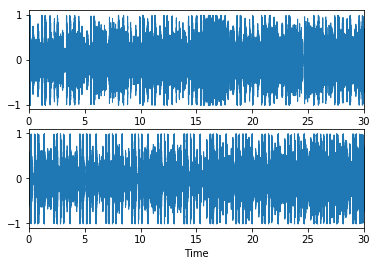

In [38]:
ad = 0
bd = 0
m = 100
a = ''
b = ''

ma = 0
a_ = ''
b_ = ''
for i in range(len(hc)-1):
    ad = hc[i][1]
    bd = hc[i+1][1]
    d = ad - bd
    if ma < d:
        ma = d
        a_ = hc[i][0]
        b_ = hc[i+1][0]
    if m > d:
        m = d
        a = hc[i][0]
        b = hc[i+1][0]
        

        

    
song1,t = librosa.load(a)
song2,t = librosa.load(b)
a_tmp = librosa.beat.tempo(song1)
b_tmp = librosa.beat.tempo(song2)

ma_song1,t = librosa.load(a_)
ma_song2,t = librosa.load(b_)
ma_a_tmp = librosa.beat.tempo(ma_song1)
ma_b_tmp = librosa.beat.tempo(ma_song2)
print('min')
print(m,a,a_tmp,b,b_tmp)
plt.subplot(2, 1, 1)
librosa.display.waveplot(song1)
plt.subplot(2, 1, 2)
librosa.display.waveplot(song2)
print('max')
print(ma,a_,ma_a_tmp,b_,ma_b_tmp)

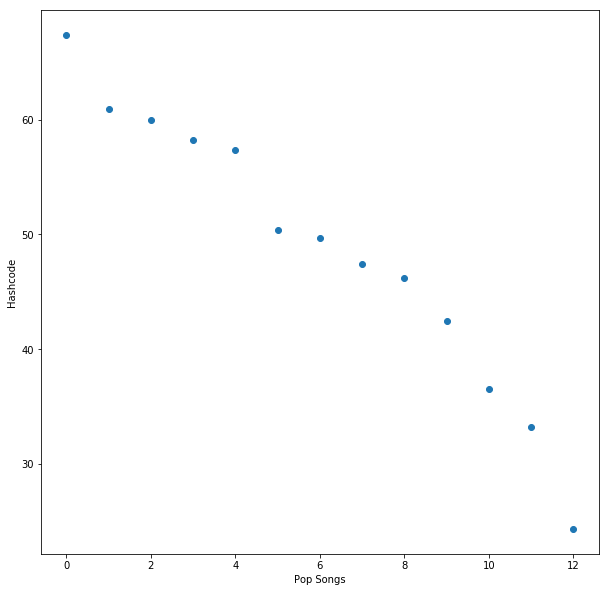

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel('Pop Songs')
plt.ylabel('Hashcode')
plt.scatter(range(len(f)),f)

In [ ]:
matching_songs = []
for r in sorted(results, key=results.get, reverse=True):
#     print(r,results[r])
    matching_songs.append([r,results[r]])

In [ ]:
sim_score = 0
playlist = []
m = 1200
a = []
b = []


sim_scores = []
for i in range(len(matching_songs)-1):
    if i < len(matching_songs):
        sim_score = matching_songs[i+1][1] - matching_songs[i][1]
        a.append(matching_songs[i+1][0])
        b.append(matching_songs[i][0])
        sim_scores.append(sim_score)
#         playlist.append([matching_songs[i], sim_score])
        
data = {"A" : a, "B": b, "Sim Scores": sim_scores}

In [ ]:
df = pd.DataFrame(data=data)
df

In [ ]:
# df.to_csv('rock.00010.wav_LSH_rock_Chroma_STFT.csv')

In [ ]:
similar_songs[0]

In [ ]:
playlist

In [ ]:
df = pd.DataFrame()

In [ ]:
ipd.Audio(a,rate=22050)

In [ ]:
ipd.Audio(b,rate=22050)

In [ ]:
playlist

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(matching_songs[0],matching_songs[1])

In [ ]:
ipd.Audio(matching_songs[0],rate=22050)

In [ ]:
ipd.Audio(matching_songs[1],rate=22050)

In [ ]:
ipd.Audio(results[r][0],rate=22050)

In [ ]:
ipd.Audio(results[r][1],rate=22050)